In [1]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Linear Regression

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Linear Regression


In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('diamond.csv')
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641


#data preparation

In [6]:
#isolate X and Y
y = df.price
X = df.carat

In [7]:
#add constant, which is a, which is always 1.0
X = sm.add_constant(X)
X.head(2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,carat
0,1.0,0.3
1,1.0,0.3


#Linear regression

In [10]:
#regression model
model1 = sm.OLS(endog=y, exog=X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2541.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):          3.04e-150
Time:                        01:49:57   Log-Likelihood:                -2597.9
No. Observations:                 308   AIC:                             5200.
Df Residuals:                     306   BIC:                             5207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2298.3576    158.531    -14.498      0.0

Text(0, 0.5, 'price')

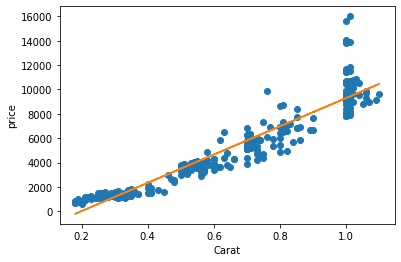

In [16]:
#plotting
X = df.carat
plt.plot(X, y, 'o')
b, a = np.polyfit(X, y, 1)
plt.plot(X, b * X + a)
plt.xlabel('Carat')
plt.ylabel('price')

#Linear regression with dummy variable

In [17]:
#look at carat variable
df.carat.describe()

count    308.000000
mean       0.630909
std        0.277183
min        0.180000
25%        0.350000
50%        0.620000
75%        0.850000
max        1.100000
Name: carat, dtype: float64

In [18]:
#create binary variable
df['carat_binary'] = np.where(df.carat > 0.6, 1, 0)
df.head(3)

,Unnamed: 0,carat,colour,clarity,certification,price,carat_binary
0,1,0.3,D,VS2,GIA,1302,0
1,2,0.3,E,VS1,GIA,1510,0
2,3,0.3,G,VVS1,GIA,1510,0


#challenge: create linear regression with binary variable and plot

In [28]:
y = df.price
X = df.carat_binary

X = sm.add_constant(X)
model2 = sm.OLS(endog=y, exog=X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     591.5
Date:                Sun, 18 Sep 2022   Prob (F-statistic):           1.79e-73
Time:                        02:31:11   Log-Likelihood:                -2775.6
No. Observations:                 308   AIC:                             5555.
Df Residuals:                     306   BIC:                             5563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2225.2303    161.442     13.783   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


> the binary will loose a lot of information as shown in below chart

Text(0, 0.5, 'price')

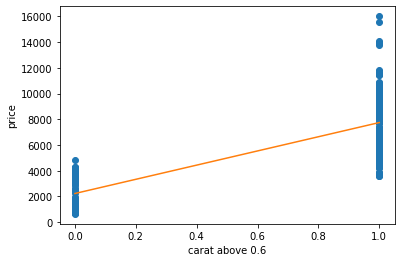

In [30]:
X = df.carat_binary
plt.plot(X, y, 'o')

b, a = np.polyfit(X, y, 1)
plt.plot(X, b*X+a)
plt.xlabel('carat above 0.6')
plt.ylabel('price')